___

#### Rick Fontenot, Joe Lazarus, Puri Rudick
####
___


## This first section is a copy of the tensorflow tutorial to confirm setup, reference:
https://www.tensorflow.org/tutorials/keras/classification

Load the Tensorflow Library

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0


In [2]:
print(tf.__version__)

2.8.0


Import the Fashion MNIST dataset

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Each image is mapped to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images:

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [5]:
train_images.shape


(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [6]:
len(train_labels)


60000

Each label is an integer between 0 and 9:

In [7]:
train_labels


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [8]:
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [9]:
len(test_labels)

10000

## Preprocess the data
The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

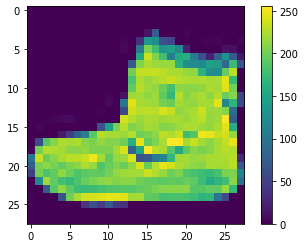

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:

In [11]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image.

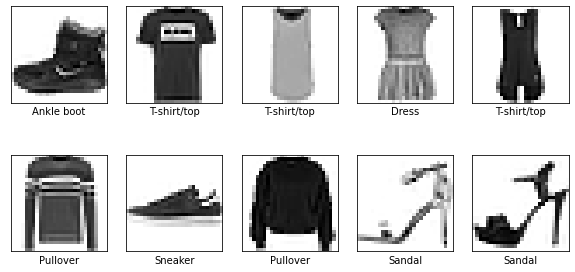

In [12]:
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model
Building the neural network requires configuring the layers of the model, then compiling the model.

Set up the layers
The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as tf.keras.layers.Dense, have parameters that are learned during training.

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-03-02 13:34:59.854484: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-02 13:34:59.854812: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

## Compile the model
Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
Optimizer —This is how the model is updated based on the data it sees and its loss function.
Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train the model
Training the neural network model requires the following steps:

Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.
The model learns to associate images and labels.
You ask the model to make predictions about a test set—in this example, the test_images array.
Verify that the predictions match the labels from the test_labels array.

## Feed the model
To start training, call the model.fit method—so called because it "fits" the model to the training data:

In [15]:
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10


2022-03-02 13:35:00.398389: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-03-02 13:35:00.547382: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 9s 5ms/step - loss: 0.5040 - accuracy: 0.8234
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3767 - accuracy: 0.8644
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3374 - accuracy: 0.8762
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3124 - accuracy: 0.8859
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2960 - accuracy: 0.8914
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2822 - accuracy: 0.8971
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2692 - accuracy: 0.8998
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2604 - accuracy: 0.9042
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2495 - accuracy: 0.9079
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2410 - accura

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.91 (or 91%) on the training data.

## Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

2022-03-02 13:36:24.175764: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 - 1s - loss: 0.3288 - accuracy: 0.8849 - 1s/epoch - 4ms/step

Test accuracy: 0.8849000334739685


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents overfitting. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. For more information, see the following:

Demonstrate overfitting: https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting

Strategies to prevent overfitting: https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting

## Make predictions
With the model trained, you can use it to make predictions about some images. Attach a softmax layer to convert the model's linear outputs—logits—to probabilities, which should be easier to interpret.

In [17]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])


In [18]:
predictions = probability_model.predict(test_images)


2022-03-02 13:36:25.307821: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:



In [19]:
predictions[0]


array([4.44178454e-08, 1.42781440e-08, 1.55540092e-09, 4.53663596e-09,
       3.94731114e-06, 2.36846710e-04, 3.16621026e-06, 2.04456821e-02,
       1.17336114e-07, 9.79310274e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [20]:
np.argmax(predictions[0])


9

So, the model is most confident that this image is an ankle boot, or class_names[9]. Examining the test label shows that this classification is correct:

In [21]:
test_labels[0]


9

Graph this to look at the full set of 10 class predictions.



In [22]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

## Verify predictions
With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

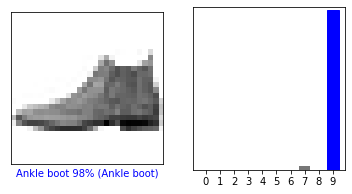

In [23]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

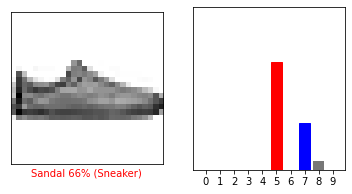

In [24]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

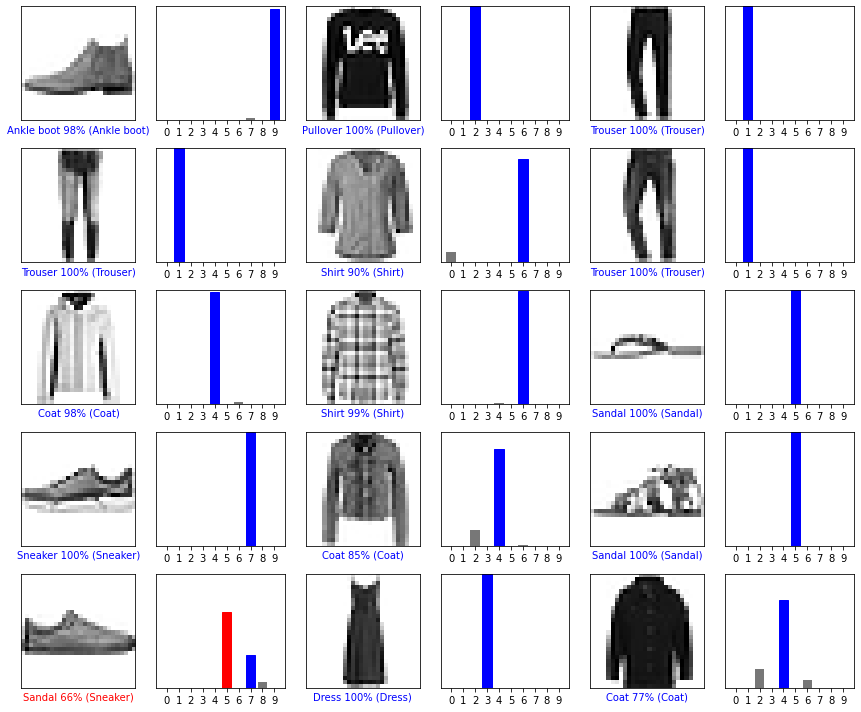

In [25]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Use the trained model
Finally, use the trained model to make a prediction about a single image.

In [26]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [27]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [28]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[8.4986583e-05 4.0952167e-17 9.9975234e-01 1.1007110e-15 1.5911250e-04
  1.7542611e-11 3.5572034e-06 2.3280873e-16 9.8606028e-12 8.4485793e-13]]


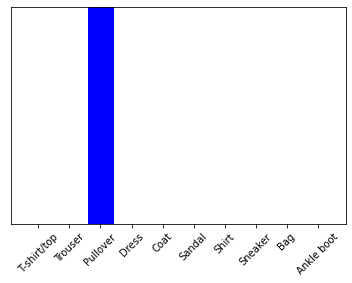

In [29]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

tf.keras.Model.predict returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [30]:
np.argmax(predictions_single[0])


2

And the model predicts a label as expected.

## End of code from tensorflow tutorial

Note that the training accuracy of 91% vs. the test accuracy of 88% highlights that overfitting is an issue

# Beginning of further EDA and model testing created by our team

convert prediction probabilities to class number

In [31]:
predicted_class = np.argmax(predictions, axis=1)


Create classification report by class with labels added

In [32]:
from sklearn.metrics import classification_report
print(classification_report(test_labels,predicted_class, 
                            target_names=class_names))



              precision    recall  f1-score   support

 T-shirt/top       0.79      0.90      0.84      1000
     Trouser       0.99      0.96      0.98      1000
    Pullover       0.74      0.85      0.79      1000
       Dress       0.91      0.88      0.89      1000
        Coat       0.82      0.80      0.81      1000
      Sandal       0.98      0.95      0.97      1000
       Shirt       0.77      0.63      0.69      1000
     Sneaker       0.94      0.96      0.95      1000
         Bag       0.99      0.96      0.98      1000
  Ankle boot       0.95      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000



<AxesSubplot:>

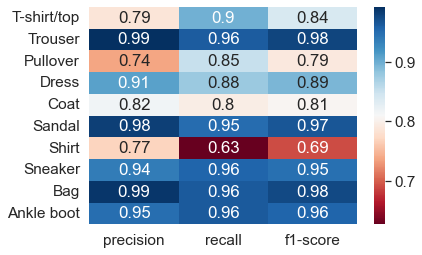

In [33]:
import seaborn as sns
import pandas as pd

labels = np.arange(10) # This is for the fine level, will have to adjust to class numbers for medium and fine level plots

# https://stackoverflow.com/questions/28200786/how-to-plot-scikit-learn-classification-report
clf_report = classification_report(test_labels,predicted_class, labels=labels, target_names=class_names,output_dict=True)


# .iloc[:-1, :] to exclude support
sns.set(font_scale=1.4)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :-3].T, annot=True, cmap='RdBu')



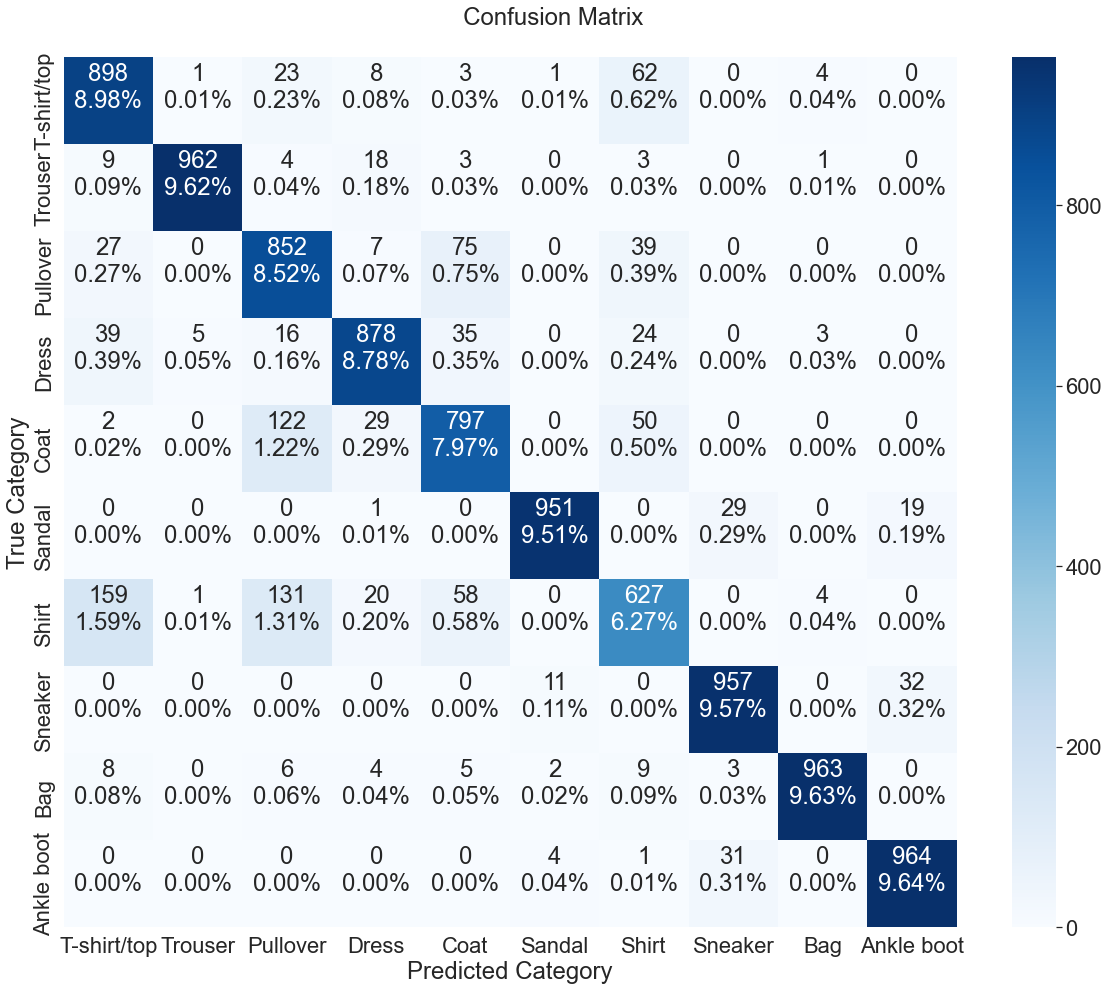

In [34]:
from sklearn.metrics import confusion_matrix

def plot_confusion(cf_matrix):
    plt.figure(figsize=(20, 16))
    sns.set(font_scale=2)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in
    cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
    cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}\n' for v1, v2 in
    zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(10,10)
    x_axis_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    y_axis_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    ax = plt.axes()
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues',xticklabels=x_axis_labels, yticklabels=y_axis_labels)
    ax.set_title('             Confusion Matrix\n')
    plt.xlabel("Predicted Category")
    plt.ylabel("True Category") 


cm = confusion_matrix(test_labels,predicted_class) 
plot_confusion(cm)

In [35]:
import pandas as pd

training_df = pd.DataFrame(train_labels)
training_df = training_df.rename(columns={training_df.columns[0]: 'label'})

def replace_all(text, dic):
    for i, j in dic.items():
        text = text.replace(i, j)
    return text

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
               
d = { 0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}

training_df['fine_label'] = replace_all(training_df['label'], d)

training_df.head(20)


,label,fine_label
0,9,Ankle boot
1,0,T-shirt/top
2,0,T-shirt/top
3,3,Dress
4,0,T-shirt/top
5,2,Pullover
6,7,Sneaker
7,2,Pullover
8,5,Sandal
9,5,Sandal


In [36]:
training_df.fine_label.unique()

array(['Ankle boot', 'T-shirt/top', 'Dress', 'Pullover', 'Sneaker',
       'Sandal', 'Trouser', 'Shirt', 'Coat', 'Bag'], dtype=object)

In [37]:
training_df['fine_label'].value_counts()

Ankle boot     6000
T-shirt/top    6000
Dress          6000
Pullover       6000
Sneaker        6000
Sandal         6000
Trouser        6000
Shirt          6000
Coat           6000
Bag            6000
Name: fine_label, dtype: int64

## This training dataset is balnced in the fine class

In [38]:
medium_dictionary = {'T-shirt/top': 'Tops', 'Trouser': 'Bottoms', 'Pullover': 'Tops', 'Dress': 'Dresses', 'Coat': 'Outers', 'Sandal': 'Shoes', 'Shirt': 'Tops', 'Sneaker': 'Shoes', 'Bag': 'Accessories', 'Ankle boot': 'Shoes'}
training_df['medium_label']= training_df['fine_label'].map(medium_dictionary)

coarse_dictionary = {'Tops': 'Clothes', 'Bottoms': 'Clothes', 'Dresses': 'Clothes', 'Outers': 'Clothes', 'Shoes': 'Goods', 'Accessories': 'Goods'}
training_df['coarse_label']= training_df['medium_label'].map(coarse_dictionary)


training_df.head()



,label,fine_label,medium_label,coarse_label
0,9,Ankle boot,Shoes,Goods
1,0,T-shirt/top,Tops,Clothes
2,0,T-shirt/top,Tops,Clothes
3,3,Dress,Dresses,Clothes
4,0,T-shirt/top,Tops,Clothes


In [39]:
training_df['medium_label'].value_counts()


Shoes          18000
Tops           18000
Dresses         6000
Bottoms         6000
Outers          6000
Accessories     6000
Name: medium_label, dtype: int64

In [40]:
training_df['coarse_label'].value_counts()


Clothes    36000
Goods      24000
Name: coarse_label, dtype: int64

In [41]:
train_images.shape

(60000, 28, 28)

In [42]:
training_df.shape

(60000, 4)

In [43]:
train_images_flattened = train_images.flatten().reshape(60000, 784)

In [44]:
train_images_flattened.shape

(60000, 784)

In [45]:
train_images_flattened_df = pd.DataFrame(train_images_flattened)
train_images_flattened_df.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.000000,0.000000,...,0.466667,0.447059,0.509804,0.298039,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.086275,...,0.000000,0.000000,0.003922,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.129412,0.376471,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
training_df = pd.concat([training_df, train_images_flattened_df], axis=1)
training_df.head()


,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,774,775,776,777,778,779,780,781,782,783
0,9,Ankle boot,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0,T-shirt/top,Tops,Clothes,0.0,0.0,0.0,0.0,0.0,0.003922,...,0.466667,0.447059,0.509804,0.298039,0.0,0.0,0.0,0.0,0.0,0.0
2,0,T-shirt/top,Tops,Clothes,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.003922,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,3,Dress,Dresses,Clothes,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0,T-shirt/top,Tops,Clothes,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
Tops_training_df = training_df[training_df.medium_label=='Tops']
Tops_training_df

,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,774,775,776,777,778,779,780,781,782,783
1,0,T-shirt/top,Tops,Clothes,0.0,0.0,0.000000,0.000000,0.000000,0.003922,...,0.466667,0.447059,0.509804,0.298039,0.000000,0.000000,0.000000,0.00000,0.0,0.0
2,0,T-shirt/top,Tops,Clothes,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.003922,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0
4,0,T-shirt/top,Tops,Clothes,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0
5,2,Pullover,Tops,Clothes,0.0,0.0,0.000000,0.000000,0.003922,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.521569,0.654902,0.286275,0.00000,0.0,0.0
7,2,Pullover,Tops,Clothes,0.0,0.0,0.000000,0.000000,0.000000,0.003922,...,0.000000,0.000000,0.011765,0.000000,0.321569,0.929412,0.905882,0.27451,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59985,0,T-shirt/top,Tops,Clothes,0.0,0.0,0.007843,0.000000,0.007843,0.000000,...,0.611765,0.682353,0.384314,0.000000,0.000000,0.000000,0.003922,0.00000,0.0,0.0
59987,6,Shirt,Tops,Clothes,0.0,0.0,0.000000,0.011765,0.000000,0.000000,...,0.509804,0.474510,0.156863,0.000000,0.000000,0.000000,0.003922,0.00000,0.0,0.0
59988,6,Shirt,Tops,Clothes,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.352941,0.478431,0.003922,0.000000,0.596078,0.419608,0.250980,0.00000,0.0,0.0
59993,2,Pullover,Tops,Clothes,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.501961,0.639216,0.243137,0.000000,0.000000,0.00000,0.0,0.0


In [48]:
training_df.groupby(['fine_label', 'medium_label','coarse_label']).count()

,,,label,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
fine_label,medium_label,coarse_label,,,,,,,,,,,,,,,,,,,,,
Ankle boot,Shoes,Goods,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000,...,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000
Bag,Accessories,Goods,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000,...,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000
Coat,Outers,Clothes,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000,...,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000
Dress,Dresses,Clothes,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000,...,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000
Pullover,Tops,Clothes,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000,...,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000
Sandal,Shoes,Goods,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000,...,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000
Shirt,Tops,Clothes,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000,...,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000
Sneaker,Shoes,Goods,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000,...,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000
T-shirt/top,Tops,Clothes,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000,...,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000


## Now repeat to create a test df with labels that can be filtered

In [49]:
test_df = pd.DataFrame(test_labels)
test_df = test_df.rename(columns={test_df.columns[0]: 'label'})

def replace_all(text, dic):
    for i, j in dic.items():
        text = text.replace(i, j)
    return text

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
               
d = { 0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}

test_df['fine_label'] = replace_all(test_df['label'], d)

medium_dictionary = {'T-shirt/top': 'Tops', 'Trouser': 'Bottoms', 'Pullover': 'Tops', 'Dress': 'Dresses', 'Coat': 'Outers', 'Sandal': 'Shoes', 'Shirt': 'Tops', 'Sneaker': 'Shoes', 'Bag': 'Accessories', 'Ankle boot': 'Shoes'}
test_df['medium_label']= test_df['fine_label'].map(medium_dictionary)

coarse_dictionary = {'Tops': 'Clothes', 'Bottoms': 'Clothes', 'Dresses': 'Clothes', 'Outers': 'Clothes', 'Shoes': 'Goods', 'Accessories': 'Goods'}
test_df['coarse_label']= test_df['medium_label'].map(coarse_dictionary)

test_images_flattened = test_images.flatten().reshape(10000, 784)

test_images_flattened_df = pd.DataFrame(test_images_flattened)

test_df = pd.concat([test_df, test_images_flattened_df], axis=1)

Tops_test_df = test_df[test_df.medium_label=='Tops']

Tops_test_df.head()


,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,774,775,776,777,778,779,780,781,782,783
1,2,Pullover,Tops,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.007843,0.011765,0.000000,0.011765,0.682353,0.741176,0.262745,0.000000,0.0,0.0
4,6,Shirt,Tops,Clothes,0.0,0.0,0.0,0.007843,0.0,0.003922,...,0.278431,0.047059,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
7,6,Shirt,Tops,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.039216,0.000000,0.000000,0.137255,0.329412,0.215686,0.000000,0.000000,0.0,0.0
16,2,Pullover,Tops,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.184314,0.000000,0.000000,0.000000,0.058824,0.478431,0.443137,0.317647,0.0,0.0
19,0,T-shirt/top,Tops,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.733333,0.678431,0.580392,0.000000,0.000000,0.003922,0.000000,0.000000,0.0,0.0


## Note that while the dataset was created with classes balanced, once the fine levels are grouped into medium and coarse layers, those levels are imbalanced

**when dealing with layers in HNN we may need to deal with imbalnce, may want to treat base model same way for control even though it's balanced**

In [50]:
test_df = pd.DataFrame(test_labels)
test_df = test_df.rename(columns={test_df.columns[0]: 'fine_label'})

test_df['fine_label'] = replace_all(test_df['fine_label'], d)

test_df.head(20)

,fine_label
0,Ankle boot
1,Pullover
2,Trouser
3,Trouser
4,Shirt
5,Trouser
6,Coat
7,Shirt
8,Sandal
9,Sneaker


In [51]:
test_df['medium_label']= test_df['fine_label'].map(medium_dictionary)

test_df['coarse_label']= test_df['medium_label'].map(coarse_dictionary)


test_df.head()

,fine_label,medium_label,coarse_label
0,Ankle boot,Shoes,Goods
1,Pullover,Tops,Clothes
2,Trouser,Bottoms,Clothes
3,Trouser,Bottoms,Clothes
4,Shirt,Tops,Clothes


In [52]:
coarse_names = ['Clothes', 'Goods']
coarse_ints = {'Clothes': 0, 'Goods': 1}

# Important note, the labels need to be of array type for tf or the training time increases significantly
train_course_labels = np.asarray(training_df['coarse_label'].map(coarse_ints))



In [53]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [54]:
train_course_labels

array([1, 0, 0, ..., 0, 0, 1])

Recompile model with just 2 nodes at output for coarse level (instead of 10)

In [55]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Important note, the labels need to be of array type for tf or the training time increases significantly


In [56]:
model.fit(train_images, train_course_labels, epochs=10)


Epoch 1/10
  32/1875 [..............................] - ETA: 6s - loss: 0.1333 - accuracy: 0.9551

2022-03-02 13:36:32.411190: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 7s 4ms/step - loss: 0.0379 - accuracy: 0.9894
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0221 - accuracy: 0.9934
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0174 - accuracy: 0.9949
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0144 - accuracy: 0.9959
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0124 - accuracy: 0.9964
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0111 - accuracy: 0.9966
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0093 - accuracy: 0.9969
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0083 - accuracy: 0.9977
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0081 - accuracy: 0.9974
Epoch 10/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0074 - accurac

In [57]:
test_course_labels = np.asarray(test_df['coarse_label'].map(coarse_ints))


In [58]:
test_loss, test_acc = model.evaluate(test_images,  test_course_labels, verbose=2)

print('\nTest accuracy:', test_acc)

2022-03-02 13:37:41.222020: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 - 1s - loss: 0.0149 - accuracy: 0.9956 - 989ms/epoch - 3ms/step

Test accuracy: 0.9956000447273254


In [59]:
coarse_probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

coarse_predictions = coarse_probability_model.predict(test_images)

coarse_predicted_class = np.argmax(coarse_predictions, axis=1)


2022-03-02 13:37:42.260723: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [60]:
print(coarse_predictions[0][0])

class0_prob = [el[0] for el in coarse_predictions]

3.3232755e-14


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


((array([-3.81060943, -3.58545756, -3.46184782, ...,  3.46184782,
          3.58545756,  3.81060943]),
  array([8.0875011e-33, 2.1124800e-31, 4.7220784e-31, ..., 1.0000000e+00,
         1.0000000e+00, 1.0000000e+00], dtype=float32)),
 (0.38682462022590136, 0.5986521840095519, 0.7932928208413371))

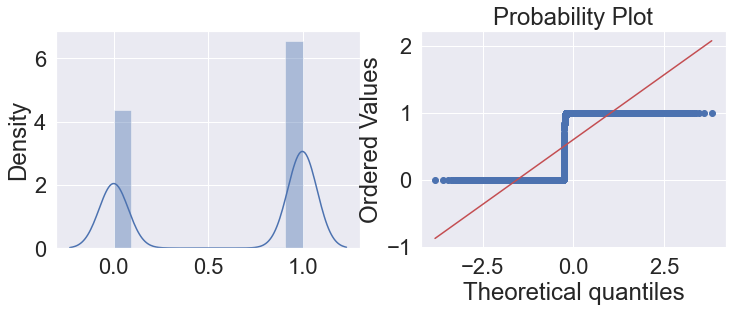

In [61]:
import scipy.stats as stats

fig, ax = plt.subplots(1,2, figsize=(12,4))

sns.distplot(class0_prob, ax=ax[0])
stats.probplot(class0_prob, dist="norm", plot=ax[1])

## Test accuracy at fine level was only 88% , at the coarse level accuracy is 99.6%

In [62]:
medium_names = ['Tops', 'Bottoms', 'Dresses', 'Outers', 'Shoes', 'Accessories']
medium_ints = {'Tops': 0, 'Bottoms': 1, 'Dresses': 2, 'Outers': 3, 'Shoes': 4, 'Accessories': 5}


# Important note, the labels need to be of array type for tf or the training time increases significantly
train_medium_labels = np.asarray(training_df['medium_label'].map(medium_ints))

In [63]:
test_medium_labels = np.asarray(test_df['medium_label'].map(medium_ints))


In [64]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(6)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [65]:
model.fit(train_images, train_medium_labels, epochs=10)


Epoch 1/10
  30/1875 [..............................] - ETA: 6s - loss: 0.8186 - accuracy: 0.7281

2022-03-02 13:37:43.826085: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 7s 4ms/step - loss: 0.2671 - accuracy: 0.9018
Epoch 2/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1986 - accuracy: 0.9262
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1797 - accuracy: 0.9323
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1656 - accuracy: 0.9380
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1545 - accuracy: 0.9424
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1474 - accuracy: 0.9444
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1388 - accuracy: 0.9476
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1329 - accuracy: 0.9503
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1287 - accuracy: 0.9508
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1221 - accurac

In [66]:
test_loss, test_acc = model.evaluate(test_images,  test_medium_labels, verbose=2)

print('\nTest accuracy:', test_acc)

2022-03-02 13:38:52.837650: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 - 1s - loss: 0.1824 - accuracy: 0.9338 - 907ms/epoch - 3ms/step

Test accuracy: 0.9338000416755676


## Test accuracy of 93.4% on medium level is less than the 99.6% at the coarse level. Does this increase if we seprate into to 2 models after splitting dataset by coarse level predictions?

## Initial Model just for Tops (not created from HNN subnets, just filtered original dataframes)

In [67]:
Tops_training_df.shape

(18000, 788)

In [68]:
tops_train_images = Tops_training_df.iloc[:,4:788].values
tops_train_labels = Tops_training_df.iloc[:, 1]

tops_test_images = Tops_test_df.iloc[:,4:788].values
tops_test_labels = Tops_test_df.iloc[:, 1]

In [69]:
tops_train_labels.unique()

array(['T-shirt/top', 'Pullover', 'Shirt'], dtype=object)

In [70]:
d_rev = { 'T-shirt/top': 0, 'Pullover': 1, 'Shirt': 2}

tops_train_labels = replace_all(tops_train_labels, d_rev)
tops_test_labels = replace_all(tops_test_labels, d_rev)

tops_train_labels = tops_train_labels.values
tops_test_labels = tops_test_labels.values

In [71]:
np.unique(tops_train_labels)

array([0, 1, 2])

In [72]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [73]:
model.fit(tops_train_images, tops_train_labels, epochs=10)


Epoch 1/10
 16/563 [..............................] - ETA: 3s - loss: 0.8646 - accuracy: 0.5762

2022-03-02 13:38:54.467255: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


563/563 [==============================] - 3s 4ms/step - loss: 0.5339 - accuracy: 0.7801
Epoch 2/10
563/563 [==============================] - 2s 4ms/step - loss: 0.4440 - accuracy: 0.8136
Epoch 3/10
563/563 [==============================] - 2s 4ms/step - loss: 0.4054 - accuracy: 0.8283
Epoch 4/10
563/563 [==============================] - 2s 4ms/step - loss: 0.3911 - accuracy: 0.8349
Epoch 5/10
563/563 [==============================] - 2s 4ms/step - loss: 0.3676 - accuracy: 0.8461
Epoch 6/10
563/563 [==============================] - 2s 4ms/step - loss: 0.3590 - accuracy: 0.8502
Epoch 7/10
563/563 [==============================] - 2s 4ms/step - loss: 0.3519 - accuracy: 0.8515
Epoch 8/10
563/563 [==============================] - 2s 4ms/step - loss: 0.3410 - accuracy: 0.8549
Epoch 9/10
563/563 [==============================] - 2s 4ms/step - loss: 0.3320 - accuracy: 0.8622
Epoch 10/10
563/563 [==============================] - 2s 4ms/step - loss: 0.3228 - accuracy: 0.8666


In [74]:
test_loss, test_acc = model.evaluate(tops_test_images,  tops_test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

2022-03-02 13:39:17.313394: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


94/94 - 0s - loss: 0.4227 - accuracy: 0.8340 - 341ms/epoch - 4ms/step

Test accuracy: 0.8339999914169312


In [75]:
tops_predictions = model.predict(tops_test_images)


2022-03-02 13:39:17.685744: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [76]:
tops_predictions[1]

array([ 0.1504914, -2.8115733,  0.8827776], dtype=float32)

In [77]:
tops_predicted_class = np.argmax(tops_predictions, axis=1)
tops_predicted_class


array([1, 2, 2, ..., 0, 1, 2])

<AxesSubplot:>

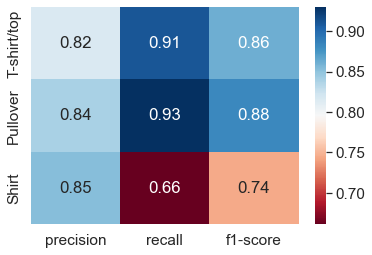

In [78]:
labels = np.arange(3) # This is for the fine level, will have to adjust to class numbers for medium and fine level plots

# https://stackoverflow.com/questions/28200786/how-to-plot-scikit-learn-classification-report
clf_report = classification_report(tops_test_labels,tops_predicted_class, labels=labels, target_names=['T-shirt/top', 'Pullover', 'Shirt'],output_dict=True)


# .iloc[:-1, :] to exclude support
sns.set(font_scale=1.4)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :-3].T, annot=True, cmap='RdBu')

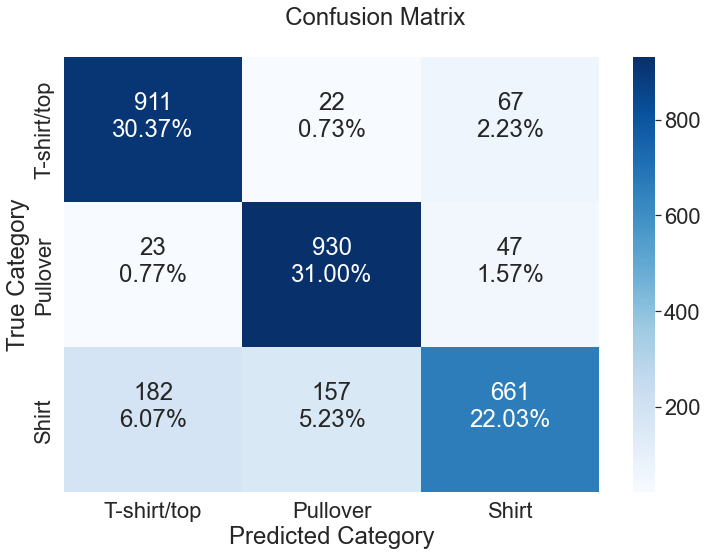

In [79]:
def plot_confusion(cf_matrix):
    plt.figure(figsize=(12, 8))
    sns.set(font_scale=2)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in
    cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
    cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}\n' for v1, v2 in
    zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(3,3)
    x_axis_labels = ['T-shirt/top', 'Pullover', 'Shirt']
    y_axis_labels = ['T-shirt/top', 'Pullover', 'Shirt']
    ax = plt.axes()
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues',xticklabels=x_axis_labels, yticklabels=y_axis_labels)
    ax.set_title('             Confusion Matrix\n')
    plt.xlabel("Predicted Category")
    plt.ylabel("True Category") 


cm = confusion_matrix(tops_test_labels,tops_predicted_class) 
plot_confusion(cm)

In [80]:
tops_predictions

array([[-4.2943144 ,  6.064557  , -2.1340415 ],
       [ 0.1504914 , -2.8115733 ,  0.8827776 ],
       [-5.836363  , -0.9992802 ,  6.3788757 ],
       ...,
       [ 2.3664632 , -6.7116933 ,  0.457142  ],
       [ 0.699542  ,  1.2650926 , -2.5811667 ],
       [-0.37699184, -0.8419731 ,  0.31493598]], dtype=float32)

In [81]:
Tshirt_prob = pd.DataFrame(tops_predictions[:,0])
Pullover_prob = pd.DataFrame(tops_predictions[:,1])
Shirt_prob = pd.DataFrame(tops_predictions[:,2])
Tops_prob_df = pd.concat([Tshirt_prob,Pullover_prob,Shirt_prob],axis=1)
Tops_prob_df = pd.concat([Tops_prob_df,pd.DataFrame(tops_test_labels)],axis=1)
Tops_prob_df.columns=['T-shirt/top', 'Pullover', 'Shirt','True_class']

d = { 0: 'T-shirt/top', 1: 'Pullover', 2: 'Shirt'}

Tops_prob_df['True_class'] = replace_all(Tops_prob_df['True_class'], d)

Tops_prob_df


,T-shirt/top,Pullover,Shirt,True_class
0,-4.294314,6.064557,-2.134042,Pullover
1,0.150491,-2.811573,0.882778,Shirt
2,-5.836363,-0.999280,6.378876,Shirt
3,-3.455678,4.778275,-1.016994,Pullover
4,2.935416,-7.527135,-1.006199,T-shirt/top
...,...,...,...,...
2995,1.980852,-6.532863,1.122509,Shirt
2996,3.769048,-7.576849,-1.859906,T-shirt/top
2997,2.366463,-6.711693,0.457142,T-shirt/top
2998,0.699542,1.265093,-2.581167,Pullover


<AxesSubplot:xlabel='Shirt', ylabel='Pullover'>

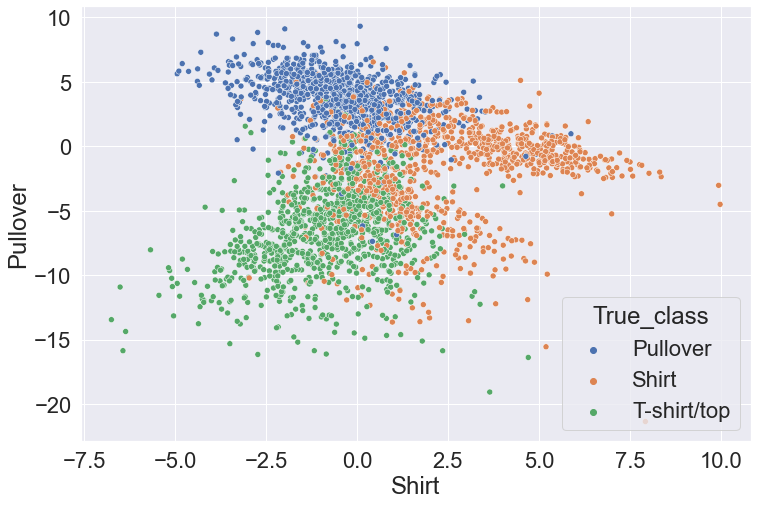

In [82]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=Tops_prob_df, x="Shirt", y="Pullover", hue="True_class")


<AxesSubplot:xlabel='Shirt', ylabel='T-shirt/top'>

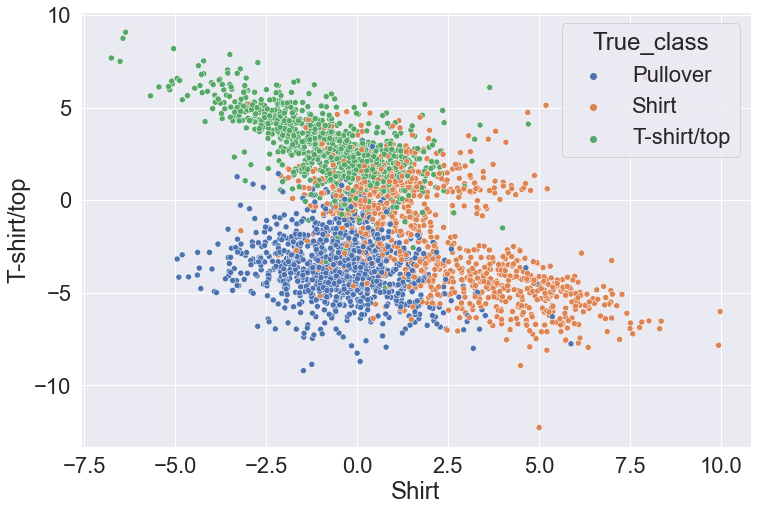

In [83]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=Tops_prob_df, x="Shirt", y="T-shirt/top", hue="True_class")

<Figure size 864x864 with 0 Axes>

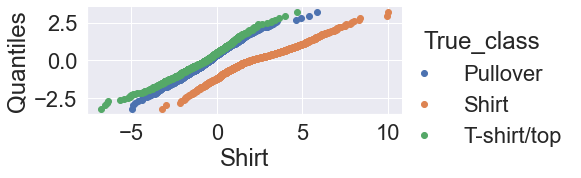

In [88]:
from matplotlib import pyplot
import probscale

plt.figure(figsize=(12, 12))
sns.FacetGrid(data=Tops_prob_df, hue='True_class', aspect=2).map(probscale.probplot, 'Shirt', plottype='qq', probax='y').set_ylabels('Quantiles').add_legend()
